In [1]:
from helpers.utilities import *
%run helpers/notebook_setup.ipynb

In [2]:
%R source('plots/colors.R');

In [3]:
clinical_path = 'data/clean/clinical/data_with_derived_variables.csv'

In [4]:
clinical = read_csv(clinical_path, index_col=0)

## Survival analysis

Also see:
 - protein data [Survival.ipynb](protein_vs_clinical/Survival.ipynb)

In [5]:
sum(~clinical['survival'].isnull())

23

Important piece: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3071962/

In [6]:
data = clinical[['censored_survival', 'Death', 'Sex', 'HIVResult', 'Meningitis', 'Tuberculosis']]

In [7]:
%%R -i data
library("survminer")
library("survival")
source('helpers/survival.R')

Loading required package: ggpubr
Loading required package: magrittr


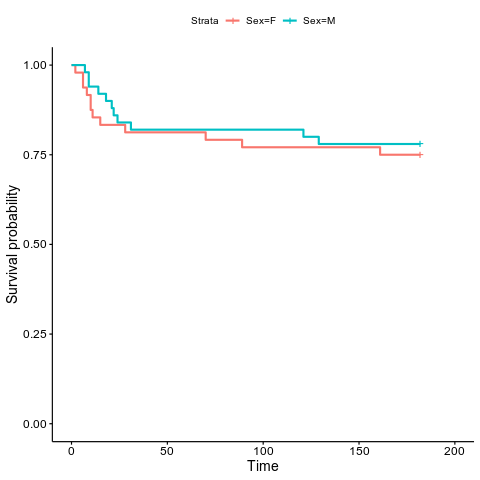

In [8]:
%%R
fit <- survfit(Surv(data$censored_survival, data$Death) ~ Sex, data=data)
ggsurvplot(fit, data=data)

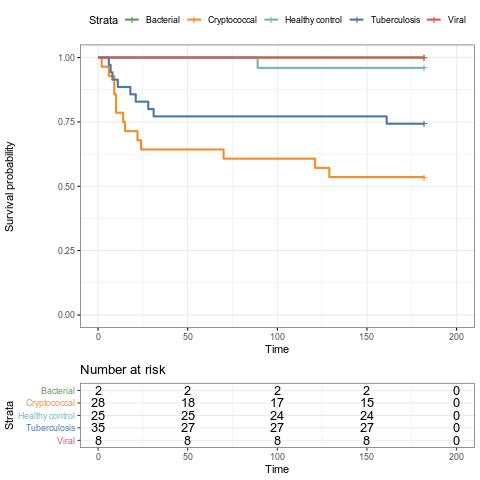

In [9]:
%%R -o fit
fit <- survfit(Surv(data$censored_survival, data$Death) ~ Meningitis, data=data)
strata = strip_strata_prefix(fit)

ggsurvplot(
    fit, data=data,
    legend.labs=strata,
    palette=patient_colors$Meningitis[strata],
    risk.table=T, ggtheme=theme_bw()
)

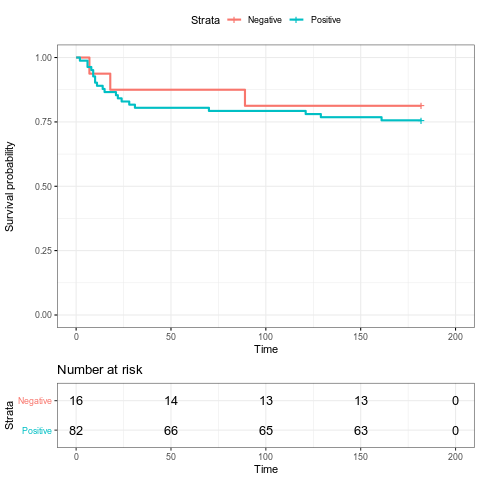

In [10]:
%%R
fit <- survfit(Surv(data$censored_survival, data$Death) ~ HIVResult, data=data)
strata = strip_strata_prefix(fit)

ggsurvplot(
    fit, data=data,
    legend.labs=strata,
    #palette=patient_colors$`HIV status`[strata],
    risk.table=T,
    ggtheme=theme_bw()
)

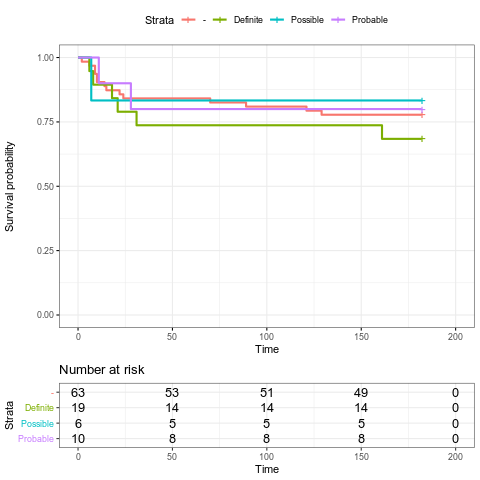

In [11]:
%%R
fit <- survfit(Surv(data$censored_survival, data$Death) ~ Tuberculosis, data=data)
strata = strip_strata_prefix(fit)

ggsurvplot(
    fit, data=data,
    legend.labs=strata,
    #palette=patient_colors$`Tuberculosis status`[strata],
    risk.table=T,
    ggtheme=theme_bw()
)